In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os



In [152]:
chemin_du_repertoire = 'C:\\Users\\yvann\\OneDrive\\Documents\\Jedha\\CERTIFICATION BLOC 6'

# Changez le répertoire de travail
os.chdir(chemin_du_repertoire)

df3 = pd.read_csv("NBA_Finals_and_MVP.csv")
print(df3)

    index  Year       Western Champion       Eastern Champion Result  \
0       0  1947          Chicago Stags  Philadelphia Warriors    1–4   
1       1  1948      Baltimore Bullets  Philadelphia Warriors    4-2   
2       2  1949     Minneapolis Lakers    Washington Capitols    4-2   
3       3  1950     Minneapolis Lakers     Syracuse Nationals    4–2   
4       4  1951       Rochester Royals        New York Knicks    4–3   
..    ...   ...                    ...                    ...    ...   
72     72  2019  Golden State Warriors        Toronto Raptors    2–4   
73     73  2020     Los Angeles Lakers             Miami Heat    4-2   
74     74  2021           Phoenix Suns        Milwaukee Bucks    2–4   
75     75  2022  Golden State Warriors         Boston Celtics    4-2   
76     76  2023         Denver Nuggets             Miami Heat    4-1   

             NBA Champion      NBA Vice-Champion Final Sweep ?  \
0   Philadelphia Warriors          Chicago Stags           NaN   
1  

In [153]:
df3.head()

,index,Year,Western Champion,Eastern Champion,Result,NBA Champion,NBA Vice-Champion,Final Sweep ?,MVP Name,MVP Height (m),MVP Height (ft),MVP Position,MVP Team,MVP Nationality,MVP status
0,0,1947,Chicago Stags,Philadelphia Warriors,1–4,Philadelphia Warriors,Chicago Stags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1948,Baltimore Bullets,Philadelphia Warriors,4-2,Baltimore Bullets,Philadelphia Warriors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1949,Minneapolis Lakers,Washington Capitols,4-2,Minneapolis Lakers,Washington Capitols,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1950,Minneapolis Lakers,Syracuse Nationals,4–2,Minneapolis Lakers,Syracuse Nationals,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1951,Rochester Royals,New York Knicks,4–3,Rochester Royals,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df3.drop(['index', 'Final Sweep ?', 'MVP Height (ft)', 'MVP Nationality',], axis=1, inplace=True)
df3.head()

,Year,Western Champion,Eastern Champion,Result,NBA Champion,NBA Vice-Champion,MVP Name,MVP Height (m),MVP Position,MVP Team,MVP status
0,1947,Chicago Stags,Philadelphia Warriors,1–4,Philadelphia Warriors,Chicago Stags,NaN,NaN,NaN,NaN,NaN
1,1948,Baltimore Bullets,Philadelphia Warriors,4-2,Baltimore Bullets,Philadelphia Warriors,NaN,NaN,NaN,NaN,NaN
2,1949,Minneapolis Lakers,Washington Capitols,4-2,Minneapolis Lakers,Washington Capitols,NaN,NaN,NaN,NaN,NaN
3,1950,Minneapolis Lakers,Syracuse Nationals,4–2,Minneapolis Lakers,Syracuse Nationals,NaN,NaN,NaN,NaN,NaN
4,1951,Rochester Royals,New York Knicks,4–3,Rochester Royals,New York Knicks,NaN,NaN,NaN,NaN,NaN


In [155]:
df3.to_csv('NBA Finals & MVP.csv', index=False)

LE CODE QUI VIENT DE ME SAUVER

In [156]:
# Lire le fichier ODS
df3 = pd.read_excel("NBA Finals & MVP.ods", engine="odf")

print(df3)

    Year       Western Champion       Eastern Champion Result  \
0   1947          Chicago Stags  Philadelphia Warriors    1–4   
1   1948      Baltimore Bullets  Philadelphia Warriors    4-2   
2   1949     Minneapolis Lakers    Washington Capitols    4-2   
3   1950     Minneapolis Lakers     Syracuse Nationals    4–2   
4   1951       Rochester Royals        New York Knicks    4–3   
..   ...                    ...                    ...    ...   
72  2019  Golden State Warriors        Toronto Raptors    2–4   
73  2020     Los Angeles Lakers             Miami Heat    4-2   
74  2021           Phoenix Suns        Milwaukee Bucks    2–4   
75  2022  Golden State Warriors         Boston Celtics    4-2   
76  2023         Denver Nuggets             Miami Heat    4-1   

             NBA Champion      NBA Vice-Champion  Western Vice-Champion  \
0   Philadelphia Warriors          Chicago Stags                    NaN   
1       Baltimore Bullets  Philadelphia Warriors                    N

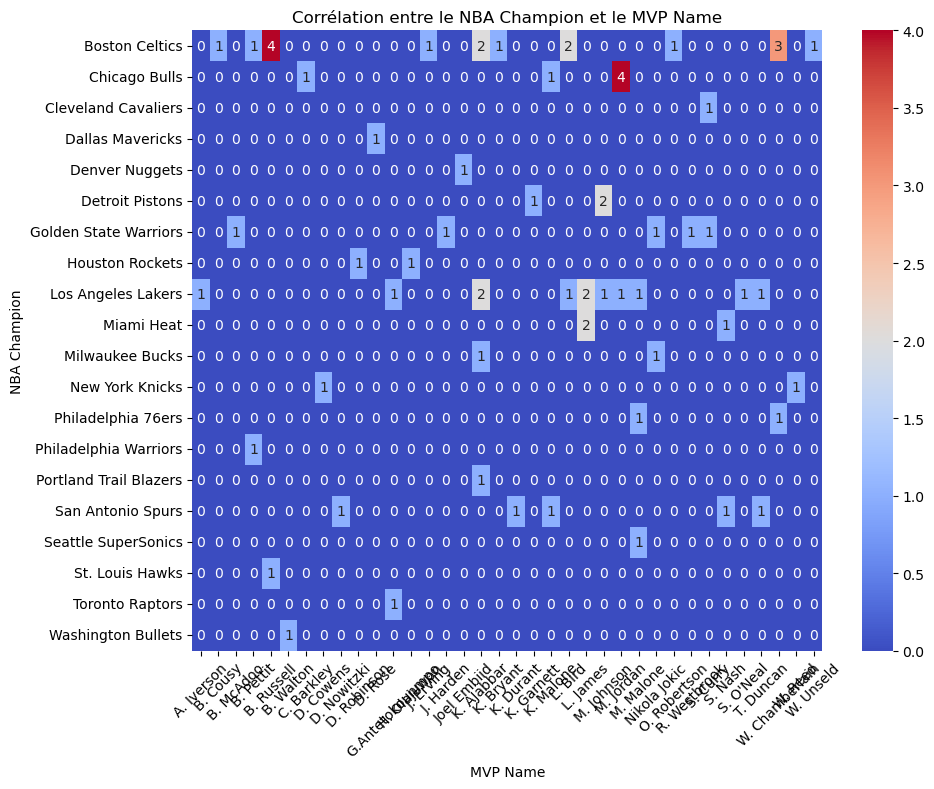

In [157]:
# Créer un tableau croisé dynamique pour examiner la corrélation entre le NBA Champion et le MVP Name
pivot_table = pd.pivot_table(df3, index='NBA Champion', columns='MVP Name', aggfunc='size', fill_value=0)

# Créer un heatmap à partir du tableau croisé dynamique
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g')
plt.title('Corrélation entre le NBA Champion et le MVP Name')
plt.xlabel('MVP Name')
plt.ylabel('NBA Champion')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [158]:
# Filtrer les données pour les années 1956 à 2023
filtered_df = df3[df3['Year'].between(1956, 2023)]

# Créer un dictionnaire pour stocker les résultats
results = {'Year': [], 'MVP Name': [], 'MVP Team': [], 'NBA Champion': [], 'MVP in Champion Team': []}

# Parcourir les données 
for index, row in filtered_df.iterrows():
    year = row['Year']
    mvp_name = row['MVP Name']
    mvp_team = row['MVP Team']
    nba_champion = row['NBA Champion']
    mvp_in_champion_team = mvp_team == nba_champion
    results['Year'].append(year)
    results['MVP Name'].append(mvp_name)
    results['MVP Team'].append(mvp_team)
    results['NBA Champion'].append(nba_champion)
    results['MVP in Champion Team'].append(mvp_in_champion_team)

# Créer un DataFrame à partir du dictionnaire
result_df = pd.DataFrame(results)

print(result_df)




    Year         MVP Name               MVP Team           NBA Champion  \
0   1956        B. Pettit      Saint Louis Hawks  Philadelphia Warriors   
1   1957         B. Cousy         Boston Celtics         Boston Celtics   
2   1958       B. Russell         Boston Celtics        St. Louis Hawks   
3   1959        B. Pettit      Saint Louis Hawks         Boston Celtics   
4   1960   W. Chamberlain  Philadelphia Warriors         Boston Celtics   
..   ...              ...                    ...                    ...   
63  2019  G.Antetokounmpo        Milwaukee Bucks        Toronto Raptors   
64  2020  G.Antetokounmpo        Milwaukee Bucks     Los Angeles Lakers   
65  2021     Nikola Jokic         Denver Nuggets        Milwaukee Bucks   
66  2022     Nikola Jokic         Denver Nuggets  Golden State Warriors   
67  2023      Joel Embiid     Philadelphia 76ers         Denver Nuggets   

    MVP in Champion Team  
0                  False  
1                   True  
2                 

In [159]:
# Filtrer les données pour ne garder que les MVP faisant partie de l'équipe championne la même année
mvp_in_champion_team_df = result_df[result_df['MVP in Champion Team']]

print(mvp_in_champion_team_df)


    Year        MVP Name               MVP Team           NBA Champion  \
1   1957        B. Cousy         Boston Celtics         Boston Celtics   
5   1961      B. Russell         Boston Celtics         Boston Celtics   
6   1962      B. Russell         Boston Celtics         Boston Celtics   
7   1963      B. Russell         Boston Celtics         Boston Celtics   
9   1965      B. Russell         Boston Celtics         Boston Celtics   
11  1967  W. Chamberlain     Philadelphia 76ers     Philadelphia 76ers   
14  1970         W. Reed        New York Knicks        New York Knicks   
15  1971      K. AJabbar        Milwaukee Bucks        Milwaukee Bucks   
24  1980      K. AJabbar     Los Angeles Lakers     Los Angeles Lakers   
27  1983       M. Malone     Philadelphia 76ers     Philadelphia 76ers   
28  1984         L. Bird         Boston Celtics         Boston Celtics   
30  1986         L. Bird         Boston Celtics         Boston Celtics   
31  1987      M. Johnson     Los Angel

In [160]:
# Trier les valeurs par ordre décroissant pour obtenir les joueurs qui ont été le plus MVP

mvp_counts = df3['MVP Name'].value_counts()
top_mvp_players = mvp_counts.sort_values(ascending=False)
print(top_mvp_players.head(15))


MVP Name
K. AJabbar         6
M. Jordan          5
B. Russell         5
W. Chamberlain     4
L. James           4
M. Malone          3
M. Johnson         3
L. Bird            3
B. Pettit          2
Nikola Jokic       2
G.Antetokounmpo    2
S. Curry           2
K. Malone          2
S. Nash            2
T. Duncan          2
Name: count, dtype: int64


In [161]:
# Compter le nombre de fois qu'une équipe a été championne NBA
champion_counts = df3['NBA Champion'].value_counts()

# Compter le nombre de fois qu'une équipe a été vice-championne NBA
vice_champion_counts = df3['NBA Vice-Champion'].value_counts()

# Concaténer les deux séries résultantes côte à côte
result = pd.concat([champion_counts, vice_champion_counts], axis=1)

# Renommer les colonnes
result.columns = ['Champion', 'Vice Champion']

print(result)

                        Champion  Vice Champion
Boston Celtics              17.0            5.0
Los Angeles Lakers          12.0           14.0
Chicago Bulls                6.0            NaN
Minneapolis Lakers           5.0            1.0
Golden State Warriors        5.0            2.0
San Antonio Spurs            5.0            1.0
Miami Heat                   3.0            4.0
Detroit Pistons              3.0            2.0
Philadelphia Warriors        2.0            1.0
Philadelphia 76ers           2.0            4.0
New York Knicks              2.0            6.0
Milwaukee Bucks              2.0            1.0
Houston Rockets              2.0            2.0
Toronto Raptors              1.0            NaN
Cleveland Cavaliers          1.0            4.0
Dallas Mavericks             1.0            1.0
Portland Trail Blazers       1.0            2.0
Seattle SuperSonics          1.0            2.0
Washington Bullets           1.0            2.0
Baltimore Bullets            1.0        

In [162]:
# Compter le nombre de titres remportés par les équipes de la conférence Ouest
west_champions = df3[df3['Western Champion'] == df3['NBA Champion']]['NBA Champion'].count()

# Compter le nombre de titres remportés par les équipes de la conférence Est
east_champions = df3[df3['Eastern Champion'] == df3['NBA Champion']]['NBA Champion'].count()

print("Nombre de titres remportés par les équipes de la conférence Ouest :", west_champions)
print("Nombre de titres remportés par les équipes de la conférence Est :", east_champions)

# Déterminer quelle conférence a remporté plus de titres
if west_champions > east_champions:
    print("Les équipes de la conférence Ouest ont remporté plus de titres NBA.")
elif west_champions < east_champions:
    print("Les équipes de la conférence Est ont remporté plus de titres NBA.")
else:
    print("Les équipes des deux conférences ont remporté le même nombre de titres NBA.")


Nombre de titres remportés par les équipes de la conférence Ouest : 37
Nombre de titres remportés par les équipes de la conférence Est : 40
Les équipes de la conférence Est ont remporté plus de titres NBA.


In [163]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   77 non-null     int64  
 1   Western Champion       77 non-null     object 
 2   Eastern Champion       77 non-null     object 
 3   Result                 77 non-null     object 
 4   NBA Champion           77 non-null     object 
 5   NBA Vice-Champion      77 non-null     object 
 6   Western Vice-Champion  0 non-null      float64
 7   Eastern Vice-Champion  0 non-null      float64
 8   MVP Name               68 non-null     object 
 9   MVP Height (m)         68 non-null     float64
 10  MVP Position           68 non-null     object 
 11  MVP Team               68 non-null     object 
 12  MVP status             68 non-null     object 
dtypes: float64(3), int64(1), object(9)
memory usage: 7.9+ KB


In [164]:
df3.isnull().sum()

Year                      0
Western Champion          0
Eastern Champion          0
Result                    0
NBA Champion              0
NBA Vice-Champion         0
Western Vice-Champion    77
Eastern Vice-Champion    77
MVP Name                  9
MVP Height (m)            9
MVP Position              9
MVP Team                  9
MVP status                9
dtype: int64